# TFC - 2º entrega intercalar

In [195]:
# limpeza de dados e produçao dataframe
import csv
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dict = {}
study_groups = {'Music', 'Book', 'DVD'}
dfs = []
dfs_cats = []
dfs_similars = []

def read_archive():
    #archives = "teste.txt"
    archives = "amazon-meta.txt"

    file = open(archives, "r", encoding="UTF-8")
    lines = file.readlines()
    asin = None
    similarities = []
    group = None
    title = None  #--Prof-- cada objeto so tem um titulo, portanto nao ha necessidade de usar uma lista, coloca None
    customer_ids = []
    cats_list = []
    most_frequent_categories = ""


    for line in lines:
        study_line = line.strip()
        #obter o grupo
        if study_line.startswith("group: "):
            group = study_line.split(":")[1].strip()

        #obter id do produto
        if study_line.startswith("ASIN: "):
            asin = study_line.split(":")[1].strip() #--Prof-- colocar .strip()
            similarities = []

        #obter titulo do produto
        if study_line.strip().startswith("title"):
            current_title = line.split(":", 1)[1].strip()
            # Append the title to the array
            title = current_title #--Prof-- title = current_title

        #obter lista de produtos semelhantes
        if study_line.startswith("similar: ") and (group in study_groups):
            similarities = study_line.split()[2:]  #--Prof-- podes simplificar p/ similarities = study_line.split()[2:]
            #--Prof-- remover esta linha, estas a adicionar a lista a ela propria, ficando c/ duplicados
            #--Prof-- remover esta linha

        #obter categorias - 1º retiramos o espaço, 2º retiramos o '|', 3º retiramos os numero identificador da categoria
        if study_line.strip().startswith("|") and (group in study_groups):
            try:
                #obtermos a categoria na posiçao 3 (colocamos 3 no array porque contamos com o espaço)
                category = study_line.strip().split('|')[3] #--Prof-- os nomes aqui podiam estar simplificados, p.e. category em vez de word_in_cats_list e categories em vez de cats_list
                category = category.split("[")[0]
            except:
                category = ""

            cats_list.append(category)

        #obter user id e rating de utilizadores que efetuaram avaliaçoes ao produto
        if study_line.strip() and study_line[0].isdigit() and (group in study_groups):
            parts = line.split()
            user_id = parts[2]
            rating = parts[4]
            customer_ids.append(f"{user_id} - {rating}")

        #quando chegamos ao fim da  informaçao de um dado produto, vamos agregar toda a informaçao ena lista-> organized_lines
        if not study_line and (group in study_groups):
            #começamos por verificar qual a catefgoria que é mais frequente
            #--Prof-- esta linha e redundante (categories=cats_list)
            categories_count = Counter(cats_list)
            if categories_count:
              most_frequent_categories = categories_count.most_common(1)[0][0]
            else:
              most_frequent_categories = ""

            #colocamos a informaçao do produto na lista
            #--Prof-- nao faz sentido colocares as variaveis numa lista se depois
            #precisas dos elementos da lista individualmente como acontece para criares o dic (so estas a complicar a leitura)
            # nao deves criar a lista mas usar as variaveis diretamente para a criacao dos dics
            # e so depois fazes o reset das variaveis
            
            if not similarities:
                similarities = None

            if not most_frequent_categories:
                most_frequent_categories = None

            data_dict = {
                'id': asin, #--Prof-- seguindo a sugestao a cima, ficaria  'id': asin (o mesmo p/ os restantes)
                'group': group.strip("[]").replace("'", ""),
                'title': title,
                'similarities': similarities,
                'categories': most_frequent_categories,
                'reviews': customer_ids
            }
            dfs.append(data_dict)
            
            customer_ids = []
            title = None
            categories = []
            cats_list = []
            group = None

    file.close()


read_archive()
full_dataSet_dataframe = pd.DataFrame(dfs)

## Data Processing


In [196]:
#Delete products that do not have a similarity or category associated
full_dataSet_dataframe = full_dataSet_dataframe.dropna(subset=['similarities'])
full_dataSet_dataframe = full_dataSet_dataframe.dropna(subset=['categories'])
full_dataSet_dataframe

,id,group,title,similarities,categories,reviews
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
1,0738700797,Book,Candlemas: Feast of Flames,"[0738700827, 1567184960, 1567182836, 073870052...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9..."
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[0842328130, 0830818138, 0842330313, 084232861...",Religion & Spirituality,[A2591BUPXCS705 - 4]
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[]
5,0486220125,Book,How the Other Half Lives: Studies Among the Te...,"[0486401960, 0452283612, 0486229076, 071484034...",History,"[ATVPDKIKX0DER - 5, AUEZ7NVOEHYRY - 5, ATVPDKI..."
...,...,...,...,...,...,...
516528,B000059TOC,DVD,The Drifter,"[630366704X, B0002ERXB8, B0001932ZU, B0001VTPU...",Special Features,[A32PCPZL40G5N8 - 5]
516529,B00006JBIX,DVD,The House Of Morecock,"[B0002HOE6C, B0002I84JO, B00004WZQN, B00069CQ8...",Genres,"[A24IFZUH8NLISK - 1, A2SVXZKU40G7N - 5, A3HM5G..."
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,"[1931709920, 188187110X, 081890643X, 158051046...",Nonfiction,[A2PD80S1N7920J - 4]
516531,B00008DDST,DVD,"1, 2, 3 Soleils: Taha, Khaled, Faudel","[B00012FWNC, B0002UNQQI, B00069FKLO, B0000CNTH...",Genres,"[A3NKS7CVEJVTQ6 - 5, A3EQ4YAZ5OEVK9 - 5, A3HRK..."


In [216]:
book = full_dataSet_dataframe[full_dataSet_dataframe['group'] == 'Book']
book

,id,group,title,similarities,categories,reviews
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
1,0738700797,Book,Candlemas: Feast of Flames,"[0738700827, 1567184960, 1567182836, 073870052...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9..."
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[0842328130, 0830818138, 0842330313, 084232861...",Religion & Spirituality,[A2591BUPXCS705 - 4]
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[]
5,0486220125,Book,How the Other Half Lives: Studies Among the Te...,"[0486401960, 0452283612, 0486229076, 071484034...",History,"[ATVPDKIKX0DER - 5, AUEZ7NVOEHYRY - 5, ATVPDKI..."
...,...,...,...,...,...,...
516518,B00006RGI2,Book,Anyway: The Paradoxical Commandments: Finding ...,"[1930722214, 0517163101, 1930722052, 088730631...",Bargain Books,"[A23NKJOK1ZNSHX - 4, A2SO8XVXBVL4M6 - 5, A1E57..."
516519,B000067JZT,Book,Just Dog,"[B0006H0HFU, B0006Q1UMA, B0002GTW7Y, B0002Z0M6...",Bargain Books,[ABKCDJI8ZMFCE - 5]
516520,B00008MNUJ,Book,A Matter of Degrees: What Temperature Reveals ...,"[0822959046, 140006256X, 0195093852, 076073406...",Bargain Books,"[A177T106IPMNY4 - 5, A2FXSRQCPOP3G5 - 5, A317E..."
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,"[0689808747, 0689820305, 0859531821, 006026686...",Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV..."


<Axes: ylabel='group'>

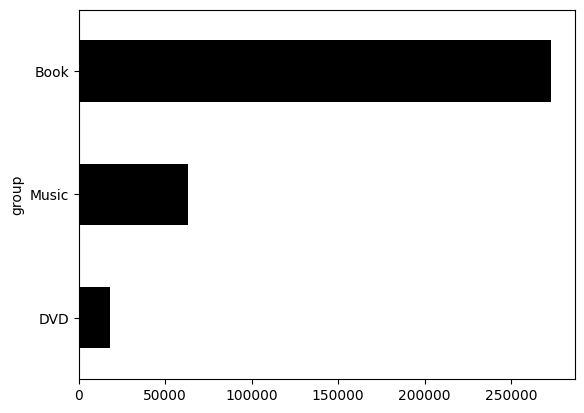

In [197]:
#Este grafico mostra a relação entre o tipo de produto e a quantidade existente no dataset
full_dataSet_dataframe.groupby('group').size().sort_values().plot(kind='barh', color='black')

In [198]:
#Ao vermos 10 categorias com mais produtos reparamos que todas elas são de livros
filtered_data = full_dataSet_dataframe[full_dataSet_dataframe['categories'] != 'Genres']

top_10_categories = filtered_data['categories'].value_counts().head(10)
top_10_categories

categories
Children's Books           30497
Nonfiction                 23671
Religion & Spirituality    23551
Literature & Fiction       21891
Health, Mind & Body        16708
Business & Investing       14745
Home & Garden              10995
History                    10481
Computers & Internet       10441
Entertainment               9078
Name: count, dtype: int64

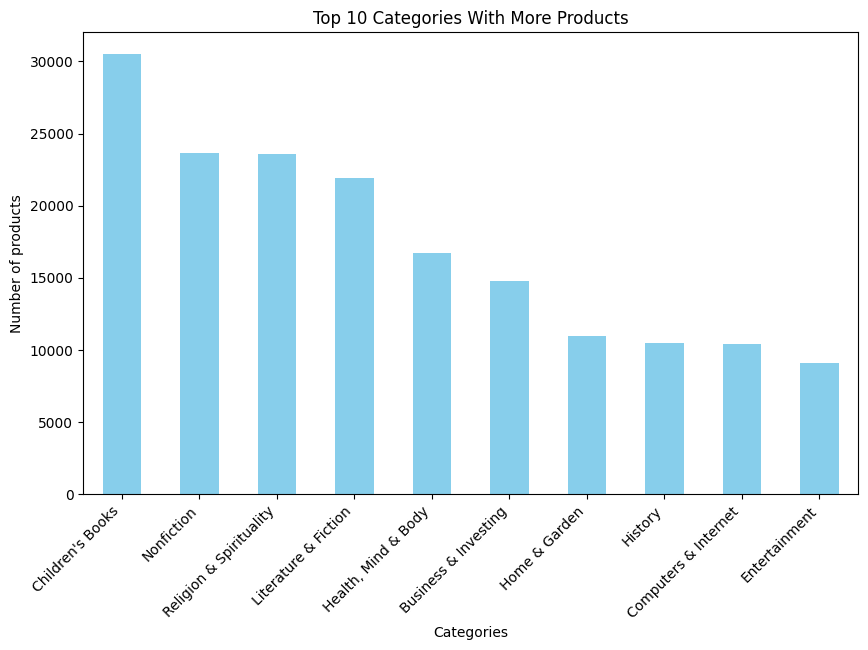

In [199]:
# Cria o gráfico de barras para as 10 categorias mais frequentes (sem 'Genres')
top_10_categories.plot(kind='bar', figsize=(10, 6),color='skyblue')

plt.title('Top 10 Categories With More Products')
plt.xlabel('Categories')
plt.ylabel('Number of products')

# Ajusta os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45, ha='right')

plt.show()

In [200]:
#Retiramos as categorias que não são generos de livros por não serem relevantes para o estudo
unwanted_categories = ['jp-unknown1', 'jp-unknown2', 'jp-unknown3', 'Genres', 'Reference', 'Books on Tape','Book Clubs','Bargain Books','Books on CD',"O'Reilly",
                       'New & Used Textbooks','Home & Office','Boxed Sets','McGraw-Hill','Sheet Music & Scores','Book Accessories','Holiday Greeting Cards','Accessories',
                       'Books, Music & More','Gift Categories','Classical','Camera & Photo','Calendars', 'Libros en español','Foreign Language Books', 'Parenting & Families','Engineering'
                       'Large Print', 'Stephen E. Ambrose', 'Miscellaneous', 'HOWdesign Studio','John Wiley & Sons', 'Opera & Vocal', 'Large Print', 'Pop', 'Gay & lesbian' ] 
book = full_dataSet_dataframe[full_dataSet_dataframe['group'] == 'Book']
book = book[~book['categories'].isin(unwanted_categories)]
book

,id,group,title,similarities,categories,reviews
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,"[0804215715, 156101074X, 0687023955, 068707423...",Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]"
1,0738700797,Book,Candlemas: Feast of Flames,"[0738700827, 1567184960, 1567182836, 073870052...",Religion & Spirituality,"[A11NCO6YTE4BTJ - 5, A9CQ3PLRNIR83 - 4, A13SG9..."
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,"[0842328130, 0830818138, 0842330313, 084232861...",Religion & Spirituality,[A2591BUPXCS705 - 4]
4,1577943082,Book,Prayers That Avail Much for Business: Executive,"[157794349X, 0892749504, 1577941829, 089274956...",Religion & Spirituality,[]
5,0486220125,Book,How the Other Half Lives: Studies Among the Te...,"[0486401960, 0452283612, 0486229076, 071484034...",History,"[ATVPDKIKX0DER - 5, AUEZ7NVOEHYRY - 5, ATVPDKI..."
...,...,...,...,...,...,...
516511,0006176909,Book,House of Cards,"[0006471641, 0006477097, B00009MGGI, 000649799...",Mystery & Thrillers,"[A1MMBWP20WQ2N3 - 5, A3R803J7QXVUI1 - 3, A2FOS..."
516512,0786632550,Book,Mel Bay's Complete Traditional Holiday Season ...,"[079357000X, 0793529395, 0793585031, 0634002066]",Entertainment,"[AR0807T2MTJBL - 4, A2CC70LC14MNT7 - 5, A29TSN..."
516514,4770023286,Book,Sengai: Master Zen Painter,"[4770029446, 1570624895]",Arts & Photography,[AOV39AQYLNIRG - 4]
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,"[0689808747, 0689820305, 0859531821, 006026686...",Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV..."


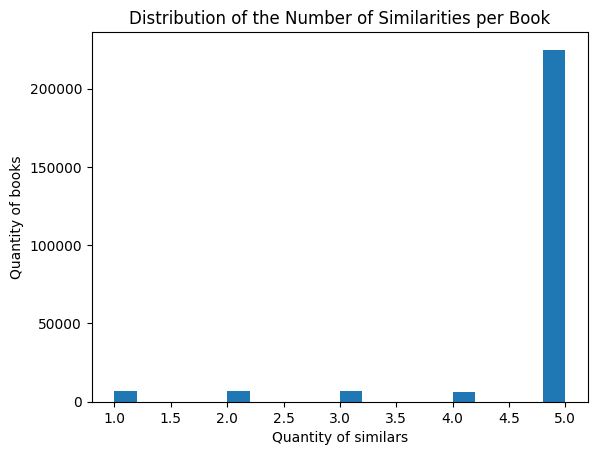

In [201]:
#no dataframe temos no maximo 5 livros semelhante por produto, mas isso nao nós diz muito sobre a quantidade de semelhantes
book['similarity_count'] = book['similarities'].apply(len)

book['similarity_count'].plot(kind='hist', bins=20) 

plt.title('Distribution of the Number of Similarities per Book')
plt.xlabel('Quantity of similars')
plt.ylabel('Quantity of books')
plt.show()

In [202]:
#Explode do dataframe relativo aos livros - isto vai permitir sabermos quais e quantos livros semelhantes tem cada livro
#Uma analise a estes dados levou ao reconhecimento de que nem todos os produtos semelhantes são produtos existentes no dataset em si
book_exploded = book.explode('similarities')
book_exploded

,id,group,title,similarities,categories,reviews,similarity_count
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0804215715,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,156101074X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687023955,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687074231,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,082721619X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
...,...,...,...,...,...,...,...
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1931709920,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,188187110X,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,081890643X,Nonfiction,[A2PD80S1N7920J - 4],5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1580510469,Nonfiction,[A2PD80S1N7920J - 4],5


In [203]:
#Vamos ver os Ids das similarities que nao estão na coluna id e retira-los
#depois queremos saber quantas vezes é que aquelas categorias foram compradas em conjunto
book_exploded = book_exploded[book_exploded['similarities'].isin(book['id'])]
book_exploded

,id,group,title,similarities,categories,reviews,similarity_count
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0804215715,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,156101074X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687023955,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,0687074231,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
0,0827229534,Book,Patterns of Preaching: A Sermon Sampler,082721619X,Religion & Spirituality,"[A2JW67OY8U6HHK - 5, A2VE83MZF98ITY - 5]",5
...,...,...,...,...,...,...,...
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0859531821,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0060266864,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5
516521,0060537612,Book,If You Take a Mouse Five-Book Set (If You Take...,0916291820,Children's Books,"[ACD2YKCA58Z0K - 5, A2SSCUKJT6LI6F - 5, A2E8EV...",5
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1580510469,Nonfiction,[A2PD80S1N7920J - 4],5


In [204]:
book_exploded[book_exploded['similarities']=='0001472933']

,id,group,title,similarities,categories,reviews,similarity_count
992,0001474103,Book,Spirit World:,0001472933,Religion & Spirituality,"[A2B2W2LJ9D7LU7 - 5, A2H27JVINU6SML - 5]",5
162090,0895403889,Book,Dispensational Truth or God's Plan and Purpose...,0001472933,Religion & Spirituality,"[A3EHJIOCSWZFRI - 5, A2SPOI5O6JEUGO - 5, ATVPD...",5


In [205]:
#Assim sabemso quantas vezes é que um produto aparece como sendo semelhante a outro
count_ids_by_similarities = book_exploded[['id','similarities']].groupby('similarities',as_index=False).count()
count_ids_by_similarities

,similarities,id
0,0001472933,2
1,0001955071,1
2,0002154129,10
3,0002154463,6
4,0002159317,3
...,...,...
152953,9997053060,2
152954,9999366651,2
152955,B00008JYQ3,6
152956,B00008NRHJ,5


In [206]:
mediana = count_ids_by_similarities['id'].median()
largest_count = count_ids_by_similarities['id'].max()
smallest_count = count_ids_by_similarities['id'].min()
print(mediana, largest_count, smallest_count)

3.0 295 1


In [207]:
#De modo a saber qual o melhor ponto de corte para analise dos dados que nos dá a informaçao da relaçaõ entre percentagem de produtos e umero de produtos recomendados
#10% dos valores são menores ou iguais a 1.0.
count_ids_by_similarities['id'].quantile([0.01,0.05,0.1,0.5,0.6,0.75,0.9])

0.01     1.0
0.05     1.0
0.10     1.0
0.50     3.0
0.60     4.0
0.75     6.0
0.90    11.0
Name: id, dtype: float64

## Network Category-Category
--- Process to create network category-category ---
É de notar que durante esta analise que referimos categoria e genero de livro como sendo o mesmo objeto

In [208]:
#Vejamos a relações entre o Id e o genero do produto. Agrupamos os produtos por categoria
study_categories = book[['categories','id']].groupby('categories')
study_categories

In [209]:
#Começamos a analisar em mais detalhes as relações categoria-categoria e produto-produto
merged_dataframe = pd.merge(book_exploded[['id','categories','similarities']], book[['id','categories']], left_on='similarities', right_on='id', how='left')
merged_dataframe

,id_x,categories_x,similarities,id_y,categories_y
0,0827229534,Religion & Spirituality,0804215715,0804215715,Religion & Spirituality
1,0827229534,Religion & Spirituality,156101074X,156101074X,Religion & Spirituality
2,0827229534,Religion & Spirituality,0687023955,0687023955,Religion & Spirituality
3,0827229534,Religion & Spirituality,0687074231,0687074231,Religion & Spirituality
4,0827229534,Religion & Spirituality,082721619X,082721619X,Religion & Spirituality
...,...,...,...,...,...
789845,0060537612,Children's Books,0859531821,0859531821,Children's Books
789846,0060537612,Children's Books,0060266864,0060266864,Children's Books
789847,0060537612,Children's Books,0916291820,0916291820,Children's Books
789848,0879736836,Nonfiction,1580510469,1580510469,Religion & Spirituality


In [210]:
#As colunas mostram os géneros que se relacionam
merged_dataframe[['categories_x', 'categories_y']]

,categories_x,categories_y
0,Religion & Spirituality,Religion & Spirituality
1,Religion & Spirituality,Religion & Spirituality
2,Religion & Spirituality,Religion & Spirituality
3,Religion & Spirituality,Religion & Spirituality
4,Religion & Spirituality,Religion & Spirituality
...,...,...
789845,Children's Books,Children's Books
789846,Children's Books,Children's Books
789847,Children's Books,Children's Books
789848,Nonfiction,Religion & Spirituality


In [211]:
cats_relation = merged_dataframe[['categories_x', 'categories_y']].groupby(['categories_x', 'categories_y']).size().reset_index(name='count')

---- Network Category-Category is created! Named cats_relation ----

In [212]:
#cats_relation representa todas as relações existentes entre generos
#a este ponto cats_relation ainda temos o erro de a-> B como B->A que sumenta erradamente o numero de relações existentes
cats_relation.to_csv('cats_relation.csv')

### Q1 - How often do you buy books in one genre compared to books in different genres?

#### Network Category-Category: same genres


In [250]:
# cats relation não se encontra filtrada 
# considerar só os que são iguais- ver a quantidade - ver a quantidade de generos iguais e compara com o resultado a baixo que só tem diferentes
file_path = 'cats_relation.csv'
study_cats = pd.read_csv(file_path)
study_cats

,Source,Target,Weight
0,Arts & Photography,Arts & Photography,18759
1,Arts & Photography,Biographies & Memoirs,473
2,Arts & Photography,Business & Investing,276
3,Arts & Photography,Children's Books,650
4,Arts & Photography,Comics & Graphic Novels,114
...,...,...,...
705,Travel,Science,249
706,Travel,Science Fiction & Fantasy,1
707,Travel,Sports,504
708,Travel,Teens,2


In [251]:
#Analisamos informaçao relativa ao os ficheiro que relaciona os generos
max_weight = study_cats['Weight'].max()  # Maximum value
min_weight = study_cats['Weight'].min()  # Minimum value
average_weight = study_cats['Weight'].mean()  # Average value

print(max_weight)
print(min_weight)
print(average_weight)

99954
1
1112.4647887323943


<Axes: >

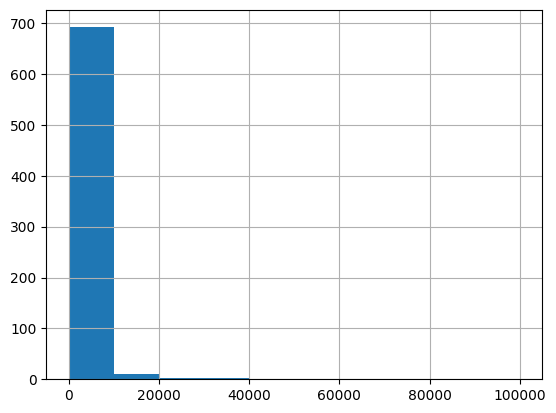

In [252]:
#Observamos que garnde parte das relaçóes existentes, um numero que chega quase aos 700, tem um peso(produtos exitentes no conjunto) perto dos 10mil
study_cats['Weight'].hist()

#### Network Category-Category: different genres
---- a partir daqui vamos filtrar o dataframe das categorias e retirar informação pertinente ao estudo ----

In [253]:
#Do resultado apresentado no grafico anterior notamos que: cats_relation apresenta relações entre generos iguais. 
#Dado esta ocorrência decidimos analisar os valores de relações entre generos iguais e generos diferentes de modo a ver o impacto destas relações na rede cats relation original!
df_unfiltered = study_cats[study_cats['Source'] == study_cats['Target']]
df_unfiltered.to_csv('onlySourceTargetEqual_csv_file.csv', index=False)

In [254]:
#Observamos assim o peso das relações entre generos literarios iguais
file_path = 'onlySourceTargetEqual_csv_file.csv'
unfiltered_cats = pd.read_csv(file_path)
unfiltered_cats 

,Source,Target,Weight
0,Arts & Photography,Arts & Photography,18759
1,Biographies & Memoirs,Biographies & Memoirs,9216
2,Business & Investing,Business & Investing,35711
3,Children's Books,Children's Books,99954
4,Comics & Graphic Novels,Comics & Graphic Novels,5534
5,Computers & Internet,Computers & Internet,29306
6,"Cooking, Food & Wine","Cooking, Food & Wine",14204
7,Engineering,Engineering,4927
8,Entertainment,Entertainment,19480
9,Gay & Lesbian,Gay & Lesbian,620


<Axes: >

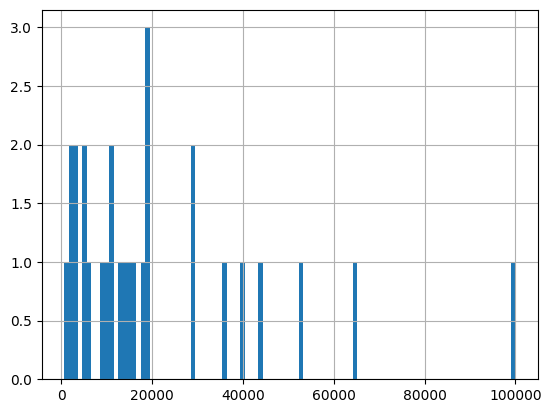

In [255]:
unfiltered_cats['Weight'].hist(bins=100)

In [256]:
#Repetimos o processo de ver maximo, minimo e media e comparamos
max_weight = unfiltered_cats['Weight'].max()  # Maximum value
min_weight = unfiltered_cats['Weight'].min()  # Minimum value
average_weight = unfiltered_cats['Weight'].mean()  # Average value

print(np.quantile(unfiltered_cats['Weight'],0.50))
print('Max:',max_weight)
print('Min:', min_weight)
print('Average:',average_weight)

14667.0
Max: 99954
Min: 620
Average: 21292.464285714286


In [257]:
#Craiamos a rede entre generos diferentes  
df_filtered = study_cats[study_cats['Source'] != study_cats['Target']]
df_filtered.to_csv('filtered_csv_file.csv', index=False)

In [258]:
df_filtered

,Source,Target,Weight
1,Arts & Photography,Biographies & Memoirs,473
2,Arts & Photography,Business & Investing,276
3,Arts & Photography,Children's Books,650
4,Arts & Photography,Comics & Graphic Novels,114
5,Arts & Photography,Computers & Internet,198
...,...,...,...
704,Travel,Religion & Spirituality,176
705,Travel,Science,249
706,Travel,Science Fiction & Fantasy,1
707,Travel,Sports,504


In [259]:
file_path = 'filtered_csv_file.csv'
filtered_cats = pd.read_csv(file_path)
# para cada linha do ficheiro quero o sorce e o traget de cada linha e apenas dou add
# faço ciclo for, sera que sorce tem o mesmo id que o target no dicionario?

<Axes: >

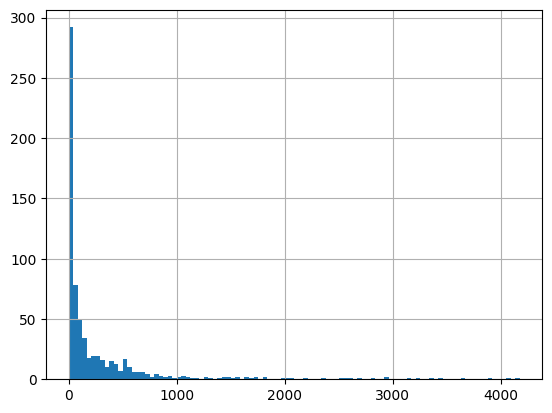

In [260]:
filtered_cats['Weight'].hist(bins=100)

In [261]:
#observmso os dados e comparamos com os obtidos anteirormente
max_weight = filtered_cats['Weight'].max()  # Maximum value
min_weight = filtered_cats['Weight'].min()  # Minimum value
average_weight = filtered_cats['Weight'].mean()  # Average value

print(np.quantile(filtered_cats['Weight'],0.50))
print('Max:',max_weight)
print('Min:', min_weight)
print('Average:',average_weight)

67.5
Max: 4173
Min: 1
Average: 283.96041055718473


In [262]:
#Foram encontradas 4 comunidades na rede genero-genero filtrada
file_path = 'rede_categoria-categoria_tabela id-modularidade.csv'
filtered_csv_modularity = pd.read_csv(file_path)
filtered_csv_modularity.set_index('Id')

,modularity_class
Id,
Arts & Photography,0
Biographies & Memoirs,1
Business & Investing,2
Children's Books,1
Comics & Graphic Novels,1
Computers & Internet,2
"Cooking, Food & Wine",3
Engineering,2
Entertainment,1


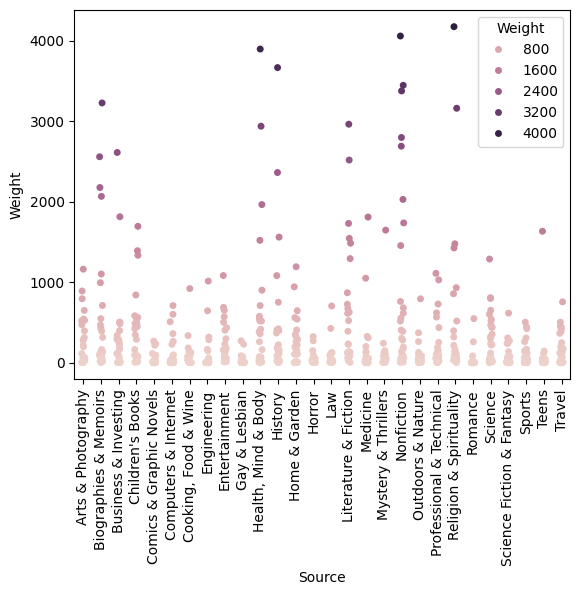

In [263]:
import seaborn as sns
sns.stripplot(data=df_filtered, x='Source', y='Weight', hue='Weight')
plt.xticks(rotation=90)
plt.show()

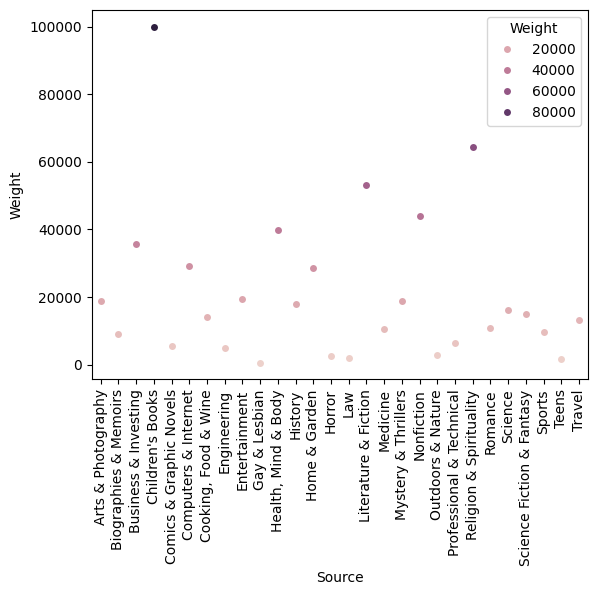

In [264]:
sns.stripplot(data=unfiltered_cats, x='Source', y='Weight', hue='Weight')
plt.xticks(rotation=90)
plt.show()

In [265]:
study_cats['Genre Relation'] = np.where(study_cats['Source'] == study_cats['Target'],'Same Genre', 'Different Genre')

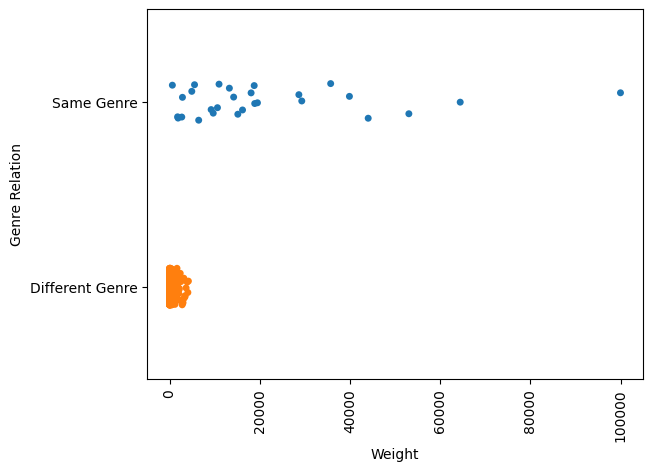

In [266]:
sns.stripplot(data=study_cats, x='Weight', y='Genre Relation', hue='Genre Relation')
plt.xticks(rotation=90)
plt.show()

### Q2 -  What different genres are often bought together?
--- Vamos normalizar os dados ---

In [267]:
#Quantos livros tem cada categoria?
book_categories = book['categories'].value_counts()
book_categories

categories
Children's Books           30496
Nonfiction                 23670
Religion & Spirituality    23551
Literature & Fiction       21887
Health, Mind & Body        16707
                           ...  
Pop                            1
Miscellaneous                  1
Opera & Vocal                  1
HOWdesign Studio               1
Actors & Actresses             1
Name: count, Length: 61, dtype: int64

In [268]:
book_categories_df = book_categories.reset_index()
book_categories_df.columns = ['Category', 'Value']

In [269]:
merged_df = pd.merge(filtered_cats, book_categories_df, left_on='Source', right_on='Category', how='left')
merged_target = pd.merge(merged_df, book_categories_df, left_on='Target', right_on='Category', how='left')
merged_target['Min_value'] = merged_target[['Value_x', 'Value_y']].min(axis=1)
merged_target['Max_value'] = merged_target[['Value_x', 'Value_y']].max(axis=1)
merged_target['Normalized_weight'] = (merged_target['Weight']/merged_target['Min_value'])
merged_target

,Source,Target,Weight,Category_x,Value_x,Category_y,Value_y,Min_value,Max_value,Normalized_weight
0,Arts & Photography,Biographies & Memoirs,473,Arts & Photography,8999,Biographies & Memoirs,9022,8999,9022,0.052561
1,Arts & Photography,Business & Investing,276,Arts & Photography,8999,Business & Investing,14745,8999,14745,0.030670
2,Arts & Photography,Children's Books,650,Arts & Photography,8999,Children's Books,30496,8999,30496,0.072230
3,Arts & Photography,Comics & Graphic Novels,114,Arts & Photography,8999,Comics & Graphic Novels,2216,2216,8999,0.051444
4,Arts & Photography,Computers & Internet,198,Arts & Photography,8999,Computers & Internet,10441,8999,10441,0.022002
...,...,...,...,...,...,...,...,...,...,...
677,Travel,Religion & Spirituality,176,Travel,7083,Religion & Spirituality,23551,7083,23551,0.024848
678,Travel,Science,249,Travel,7083,Science,8245,7083,8245,0.035155
679,Travel,Science Fiction & Fantasy,1,Travel,7083,Science Fiction & Fantasy,5401,5401,7083,0.000185
680,Travel,Sports,504,Travel,7083,Sports,4148,4148,7083,0.121504


## Network Product-Product

----- Escolhemos que parte do dataset vamos estudar para a relação produto-produto ------

In [270]:
#Aqui é decidida a parte do dataset que vai ser analisada - assim sendo o objetivo para este é ir para alem das 5 recomendações
restricao = count_ids_by_similarities[count_ids_by_similarities['id'] <= 4]
print(len(restricao))

book_filtrado = book[book['id'].isin(restricao['similarities'].to_list())]

95131


In [271]:
#Para este novo corte precisamos de fazer explode tal como feito inicialmente
book_exploded_2 = book_filtrado.explode('similarities')
book_exploded_2

,id,group,title,similarities,categories,reviews
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0842328130,Religion & Spirituality,[A2591BUPXCS705 - 4]
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0830818138,Religion & Spirituality,[A2591BUPXCS705 - 4]
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0842330313,Religion & Spirituality,[A2591BUPXCS705 - 4]
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0842328610,Religion & Spirituality,[A2591BUPXCS705 - 4]
3,0842328327,Book,Life Application Bible Commentary: 1 and 2 Tim...,0842328572,Religion & Spirituality,[A2591BUPXCS705 - 4]
...,...,...,...,...,...,...
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1931709920,Nonfiction,[A2PD80S1N7920J - 4]
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,188187110X,Nonfiction,[A2PD80S1N7920J - 4]
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,081890643X,Nonfiction,[A2PD80S1N7920J - 4]
516530,0879736836,Book,Catholic Bioethics and the Gift of Human Life,1580510469,Nonfiction,[A2PD80S1N7920J - 4]


In [272]:
#Criamos o csv que mostra a relação entre produtos - produts_relation
products_network = book_exploded_2[['id','similarities']]
products_network.to_csv('produts_relation.csv')

---- Estudo da modularidade da rede produto-produto criada ----

In [284]:
# Foi importado do gephi o ficheiro que mostra a modularidade da rede produto-produto
file_path ='modularidade_rede_produto_produto.csv'
product_h = pd.read_csv(file_path)

In [285]:
modularity = product_h['modularity_class'].value_counts()
modularity

modularity_class
2418    9906
1842    7390
190     5170
2243    5022
1462    5014
        ... 
2538       2
2213       2
991        2
2219       2
898        2
Name: count, Length: 2690, dtype: int64

In [286]:
len(modularity[modularity<=5])

380

<Axes: >

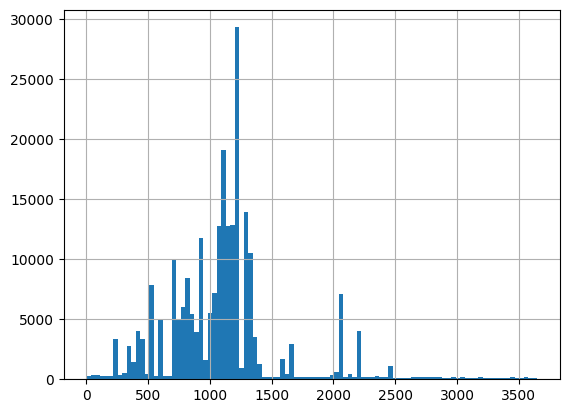

In [276]:
product_h['modularity_class'].hist(bins=100)

<Axes: ylabel='Frequency'>

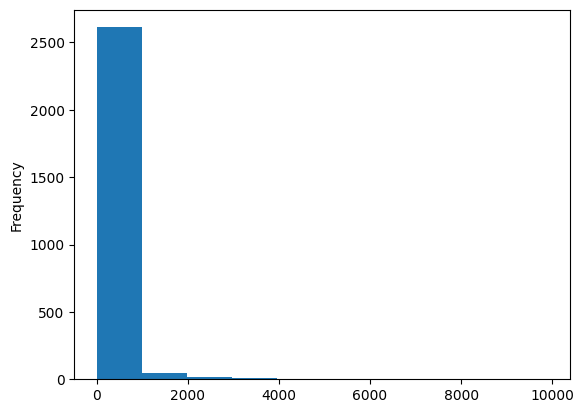

In [287]:
modularity.plot(kind='hist')

<Axes: >

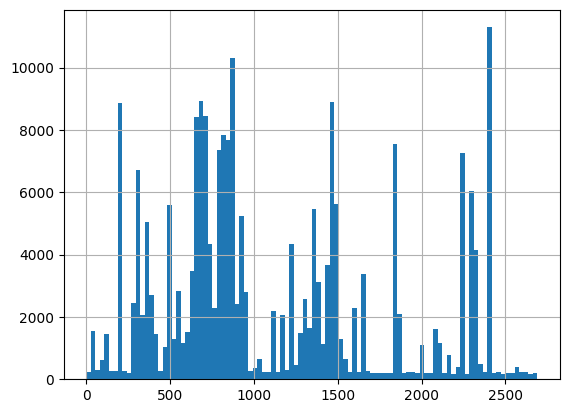

In [288]:
product_h['modularity_class'].hist(bins=100)